<a href="https://colab.research.google.com/github/06Sanjay/sanjay-repository-/blob/main/Netflix_data_Cleaning%2C_Analysis_and_Visualization_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NETFLIX DATA PROJECT

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [7]:
df = pd.read_csv('netflix_titles.csv')

In [8]:
df.shape

(8790, 10)

ANALYZING DATASET AND DATA CLEANING

In [9]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [31]:
print(df.isnull().sum())

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
genres          0
dtype: int64


In [141]:
df.drop_duplicates(inplace=True)

In [12]:
df.dropna(subset=['director', 'title', 'country'],
inplace=True)

In [11]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [13]:
print(df.dtypes)

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object


In [42]:
df['date_added']=df['date_added'].dt.year
df['date_added'].dtypes

dtype('int32')

HANDLING MISSING VALUES

In [14]:
df[df.date_added.isnull()]

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in


In [43]:
df[df.show_id=='s3']

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,Minutes,unit
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",1.0,Season


In [15]:
df[df.duration.isnull()]

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in


DATA VISUALIZATION

In [30]:
df['type'].value_counts()

,count
type,
Movie,6126
TV Show,2664


In [16]:
type_counts = df['type'].value_counts()

<ipython-input-148-d75cf4bc67e5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values,


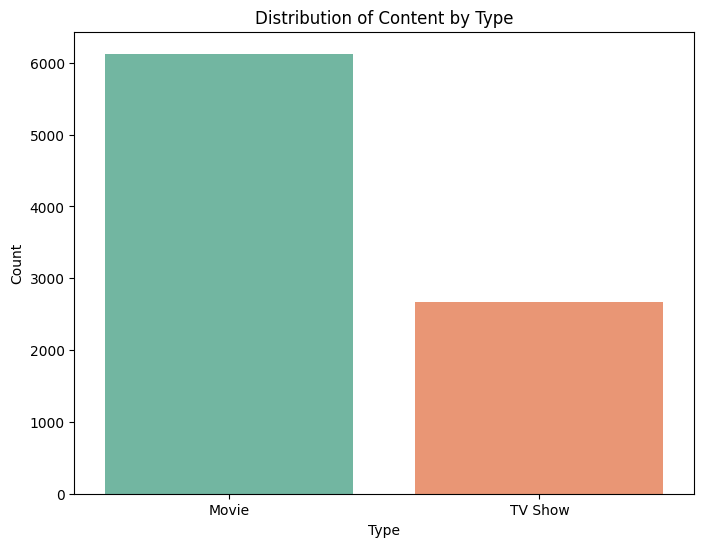

In [148]:
plt.figure(figsize=(8, 6))
sns.barplot(x=type_counts.index, y=type_counts.values,
palette='Set2')
plt.title('Distribution of Content by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

In [17]:
df['country'].value_counts().head(10)

,count
country,
United States,3240
India,1057
United Kingdom,638
Pakistan,421
Not Given,287
Canada,271
Japan,259
South Korea,214
France,213


Text(0.5, 1.0, 'country wise content on netflix')

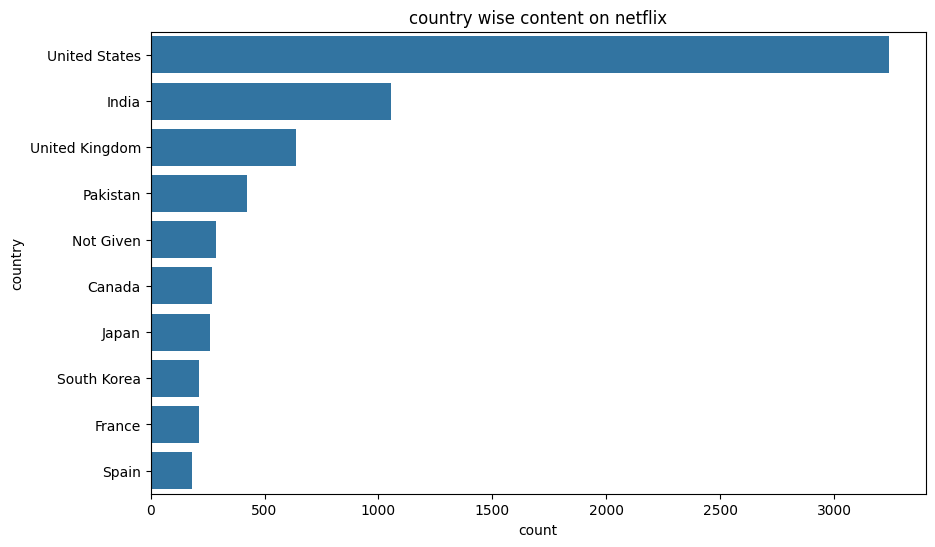

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(y='country',order=df['country'].value_counts().index[0:10],data=df)
plt.title('country wise content on netflix')

In [22]:
movies_countries=df[df['type']=='Movie']
tv_show_countries=df[df['type']=='TV Show']

Text(0.5, 1.0, 'top 10 countries producing movies in Netflix')

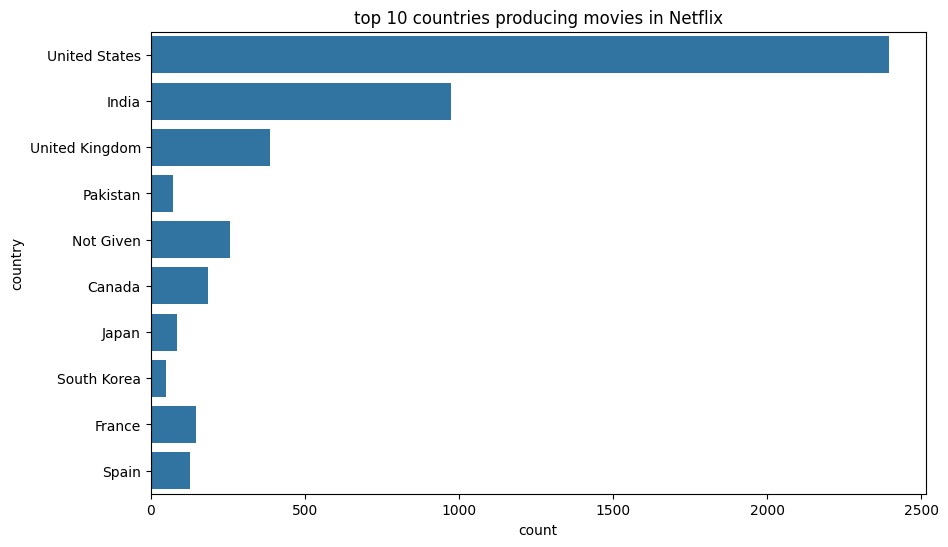

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(y='country',order =df['country'].value_counts().index[0:10],data=movies_countries)
plt.title('top 10 countries producing movies in Netflix')

In [54]:
df.rating.value_counts()

,count
rating,
TV-MA,3205
TV-14,2157
TV-PG,861
R,799
PG-13,490
TV-Y7,333
TV-Y,306
PG,287
TV-G,220


Text(0.5, 1.0, 'rating of shows on Netflix vs count')

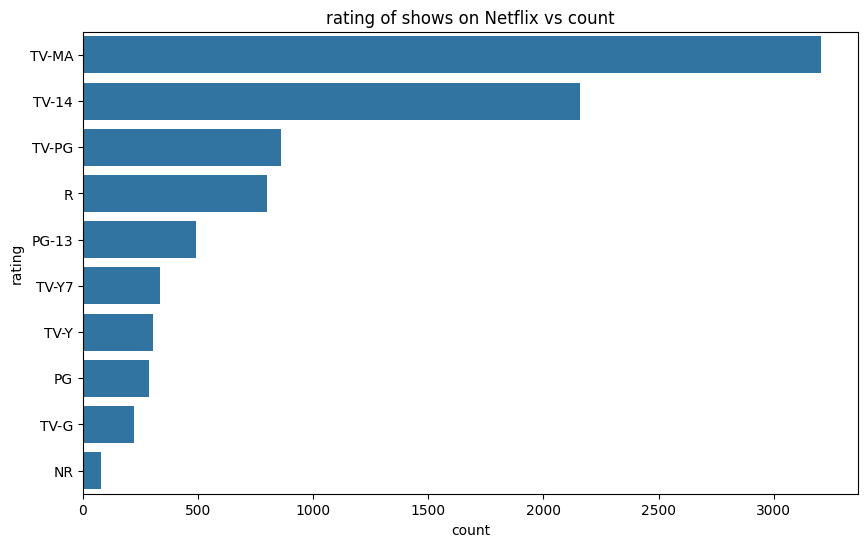

In [49]:
plt.figure(figsize = (10, 6))
sns.countplot(y = 'rating', order = df['rating'].value_counts().index[0:10], data = df)
plt.title('rating of shows on Netflix vs count')

In [24]:
df.release_year.value_counts()[:20]

,count
release_year,
2018,1146
2019,1030
2017,1030
2020,953
2016,901
2021,592
2015,555
2014,352
2013,286


Text(0.5, 1.0, 'content release in years on Netflix vs count')

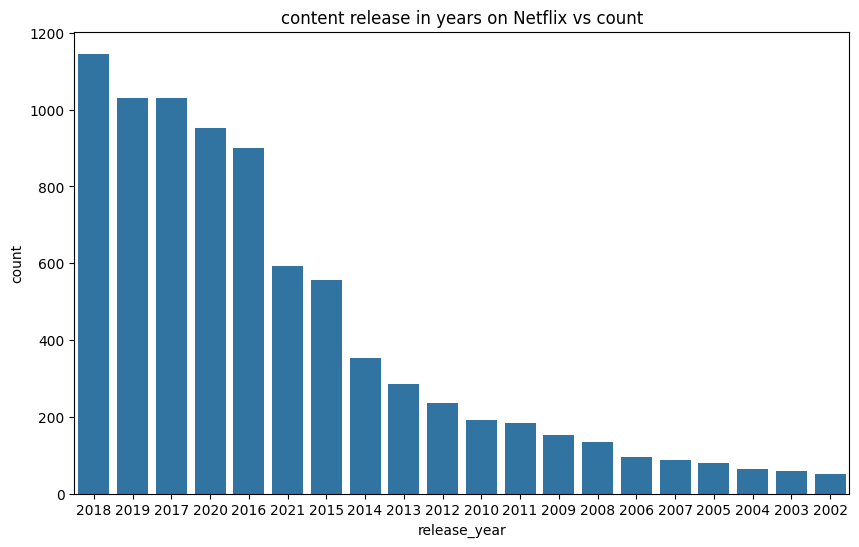

In [25]:
plt.figure(figsize = (10, 6))
sns.countplot(x = 'release_year', order = df['release_year'].value_counts().index[0:20], data = df)
plt.title('content release in years on Netflix vs count')

GENRES ANALYSIS

Text(0.5, 1.0, 'Top 20 Genres on Netflix')

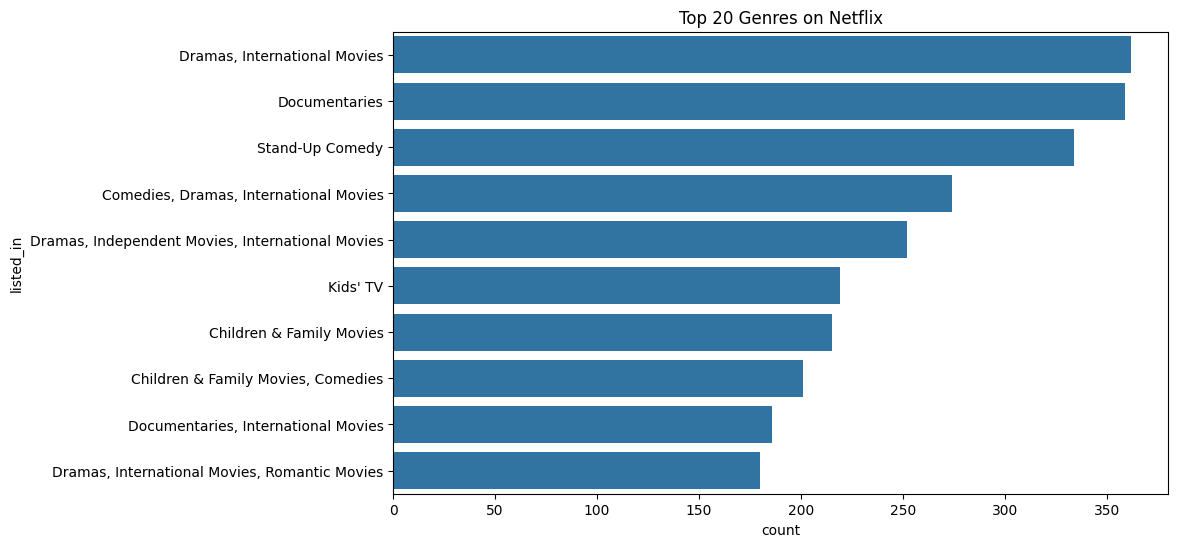

In [58]:
plt.figure(figsize=(10, 6))
sns.countplot(y='listed_in', order=df['listed_in'].value_counts().index[0:10], data=df)
plt.title('Top 20 Genres on Netflix')

In [64]:
df['genres'] = df['listed_in'].apply(lambda x: x.split(','))
all_genres = sum(df['genres'], [])
genre_counts = pd.Series(all_genres).value_counts().head(10)
genre_counts = pd.Series(all_genres).value_counts().head(10)

<ipython-input-53-f4f4cfea6983>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.values, y=type_counts.index,


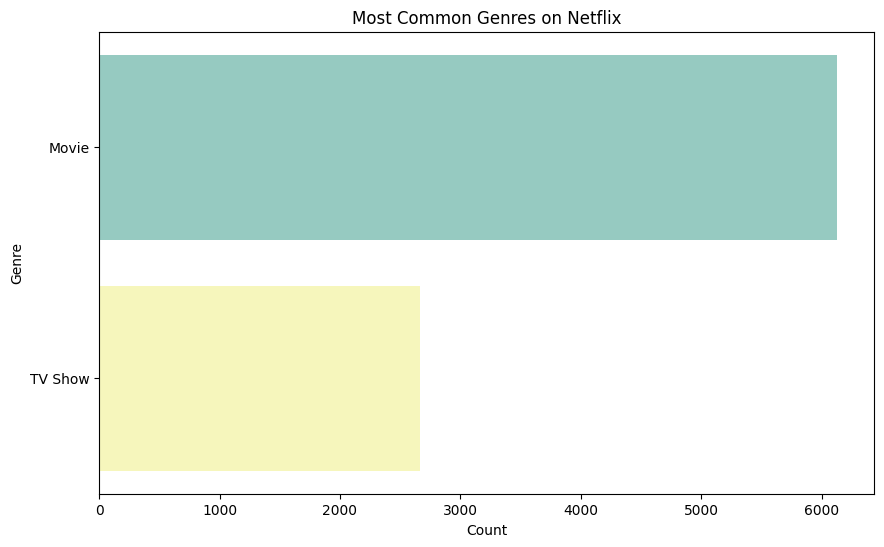

In [53]:
plt.figure(figsize=(10, 6))
sns.barplot(x=type_counts.values, y=type_counts.index,
palette='Set3')
plt.title('Most Common Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

In [ ]:
df.describe()

,date_added,release_year
count,8790.000000,8790.000000
mean,2018.873606,2014.183163
std,1.573568,8.825466
min,2008.000000,1925.000000
25%,2018.000000,2013.000000
50%,2019.000000,2017.000000
75%,2020.000000,2019.000000
max,2021.000000,2021.000000


Text(0.5, 0.98, 'Total Content on Netflix')

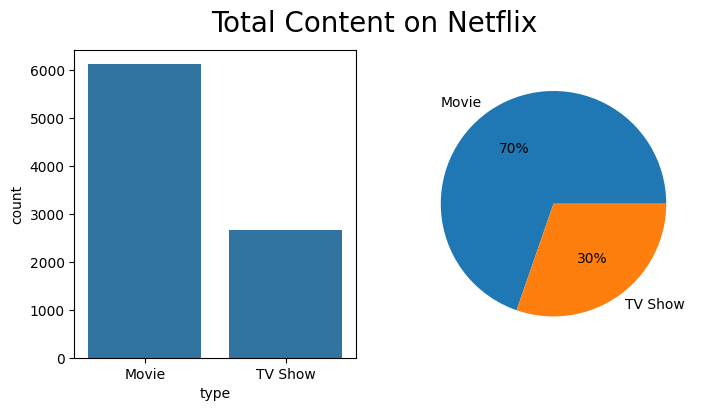

In [ ]:
freq=df['type'].value_counts()
fig, axes=plt.subplots(1,2, figsize=(8, 4))
sns.countplot(df, x=df['type'], ax=axes[0])
plt.pie(freq, labels=['Movie', 'TV Show'], autopct='%.0f%%')
plt.suptitle('Total Content on Netflix', fontsize=20)

In [ ]:
top_directors = df['director'].value_counts().head(10)

<ipython-input-47-eb83b5037f00>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index,


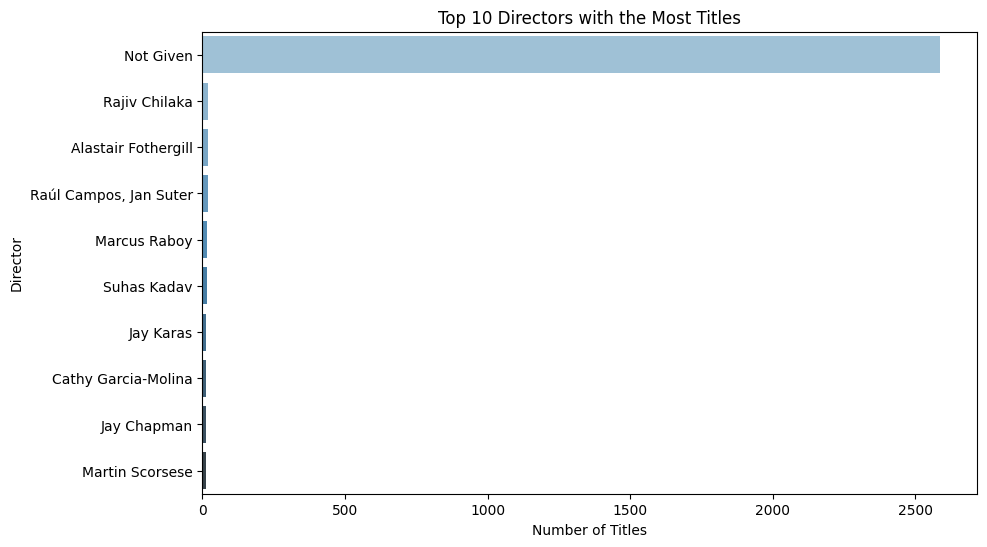

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors.values, y=top_directors.index,
palette='Blues_d')
plt.title('Top 10 Directors with the Most Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

TOP DIRECTORS ANALYSIS

In [41]:
df['director']=df['director'].fillna('Director not specified')
df.head()


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,Minutes,unit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,90.0,min
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",1.0,Season
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",1.0,Season
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",91.0,min
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",125.0,min


In [68]:
directors_list = pd.DataFrame()
print(directors_list)
directors_list = df['director'].str.split(',', expand=True).stack()
print(directors_list)

Empty DataFrame
Columns: []
Index: []
0     0    Kirsten Johnson
1     0    Julien Leclercq
2     0      Mike Flanagan
3     0      Bruno Garotti
4     0       Haile Gerima
                ...       
8785  0          Not Given
8786  0          Not Given
8787  0          Not Given
8788  0          Not Given
8789  0          Not Given
Length: 9610, dtype: object


In [69]:
directors_list = directors_list.to_frame()
print(directors_list)

                      0
0    0  Kirsten Johnson
1    0  Julien Leclercq
2    0    Mike Flanagan
3    0    Bruno Garotti
4    0     Haile Gerima
...                 ...
8785 0        Not Given
8786 0        Not Given
8787 0        Not Given
8788 0        Not Given
8789 0        Not Given

[9610 rows x 1 columns]


In [70]:
directors_list.columns = ['Director']
print(directors_list)

               Director
0    0  Kirsten Johnson
1    0  Julien Leclercq
2    0    Mike Flanagan
3    0    Bruno Garotti
4    0     Haile Gerima
...                 ...
8785 0        Not Given
8786 0        Not Given
8787 0        Not Given
8788 0        Not Given
8789 0        Not Given

[9610 rows x 1 columns]


In [72]:
directors = directors_list.groupby(['Director']).size().reset_index(name='Total Count')
print(directors)


                       Director  Total Count
0                Aaron Moorhead            2
1                   Aaron Woolf            1
2      Abbas Alibhai Burmawalla            1
3              Abdullah Al Noor            1
4           Abhinav Shiv Tiwari            1
...                         ...          ...
5115                Çagan Irmak            1
5116           Ísold Uggadóttir            1
5117        Óskar Thór Axelsson            1
5118           Ömer Faruk Sorak            2
5119               Şenol Sönmez            2

[5120 rows x 2 columns]


In [73]:
directors = directors[directors.Director != 'Director not specified']
print(directors)

                       Director  Total Count
0                Aaron Moorhead            2
1                   Aaron Woolf            1
2      Abbas Alibhai Burmawalla            1
3              Abdullah Al Noor            1
4           Abhinav Shiv Tiwari            1
...                         ...          ...
5115                Çagan Irmak            1
5116           Ísold Uggadóttir            1
5117        Óskar Thór Axelsson            1
5118           Ömer Faruk Sorak            2
5119               Şenol Sönmez            2

[5120 rows x 2 columns]


In [74]:
directors = directors.sort_values(by=['Total Count'], ascending = False)
print(directors)

                 Director  Total Count
3698            Not Given         2588
4020        Rajiv Chilaka           23
841   Alastair Fothergill           19
261             Jan Suter           18
4067          Raúl Campos           18
...                   ...          ...
2333             Ivan Sen            1
611    Songyos Sugmakanan            1
612          Sonia Dauger            1
2330  Ivan Andrew Payawal            1
2338     Iñaki Dorronsoro            1

[5120 rows x 2 columns]


In [75]:
top5Directors = directors.head()
print(top5Directors)

                 Director  Total Count
3698            Not Given         2588
4020        Rajiv Chilaka           23
841   Alastair Fothergill           19
261             Jan Suter           18
4067          Raúl Campos           18


In [80]:
movie_titles = df[df['type'] == 'Movie']['title']
wordcloud = WordCloud(width=800, height=400,
background_color='black').generate(' '.join(movie_titles))

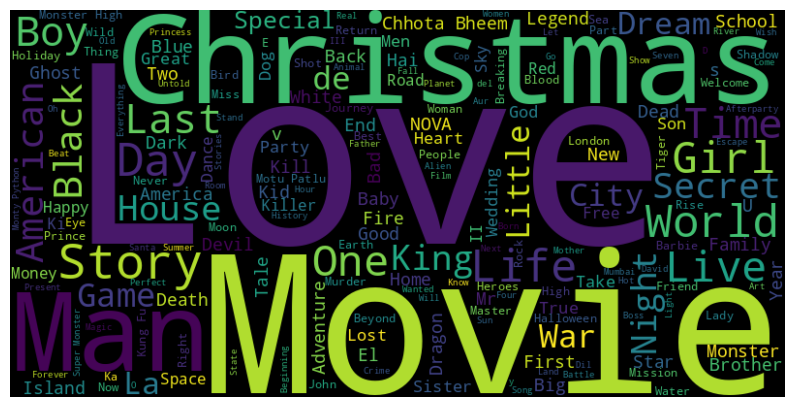

In [98]:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
ratings=df['rating'].value_counts().reset_index().sort_values(by='count', ascending=False)

Text(0.5, 0.98, 'Rating on Netflix')

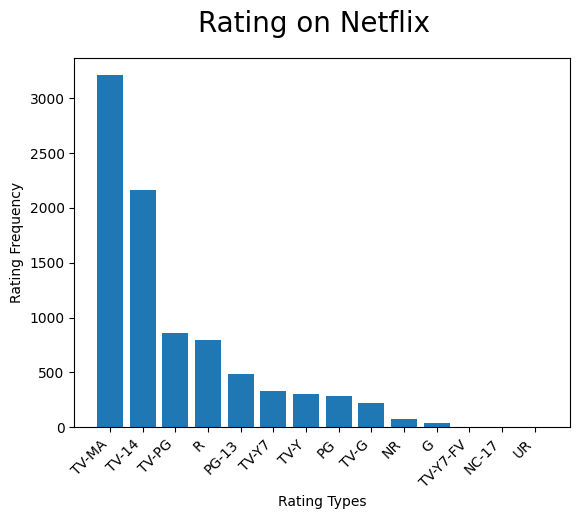

In [ ]:
plt.bar(ratings['rating'], ratings['count'])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Rating Types")
plt.ylabel("Rating Frequency")
plt.suptitle('Rating on Netflix', fontsize=20)

HIGHEST DURATION OF MOVIE/TV SHOW

In [29]:
df.duration.unique()

array(['90 min', '1 Season', '91 min', '125 min', '9 Seasons', '104 min',
       '87 min', '127 min', '76 min', '71 min', '131 min', '39 min',
       '36 min', '34 min', '35 min', '46 min', '67 min', '65 min',
       '61 min', '166 min', '103 min', '97 min', '106 min', '2 Seasons',
       '4 Seasons', '147 min', '94 min', '161 min', '111 min', '110 min',
       '105 min', '96 min', '124 min', '116 min', '98 min', '115 min',
       '122 min', '55 min', '99 min', '88 min', '100 min', '6 Seasons',
       '3 Seasons', '23 min', '102 min', '93 min', '95 min', '85 min',
       '83 min', '182 min', '5 Seasons', '92 min', '84 min', '48 min',
       '145 min', '119 min', '80 min', '128 min', '143 min', '273 min',
       '117 min', '114 min', '118 min', '108 min', '37 min', '121 min',
       '63 min', '142 min', '113 min', '154 min', '120 min', '82 min',
       '109 min', '101 min', '86 min', '77 min', '229 min', '15 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '44 min',
  

In [30]:
df.duration .dtypes

dtype('O')

Str.Split()

In [36]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [37]:

df[['Minutes','unit']] = df['duration'].str.split(' ', expand=True)


df['unit'] = df['duration'].str.extract(r'([a-zA-Z]+)')
df['Minutes'] = df['duration'].str.extract(r'(\d+)').astype(float)

In [44]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,Minutes,unit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021,2020,PG-13,90 min,Documentaries,90.0,min
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",1.0,Season
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",1.0,Season
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies",91.0,min
4,s8,Movie,Sankofa,Haile Gerima,United States,2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",125.0,min


In [40]:
df['Minutes'].max()

312.0

In [46]:
df_tvshows = df[df['type'] == 'TV Show']
df_movies = df[df['type'] == 'Movie']

In [47]:
df_tvshows.country.value_counts()

,count
country,
United States,845
Pakistan,350
United Kingdom,251
Japan,172
South Korea,165
Canada,84
India,81
Taiwan,71
France,65


In [45]:
x = df.groupby(['rating']).size().reset_index(name='counts')
print(x)

      rating  counts
0          G      41
1      NC-17       3
2         NR      79
3         PG     287
4      PG-13     490
5          R     799
6      TV-14    2157
7       TV-G     220
8      TV-MA    3205
9      TV-PG     861
10      TV-Y     306
11     TV-Y7     333
12  TV-Y7-FV       6
13        UR       3


In [ ]:
df['rating'].value_counts()

,count
rating,
TV-MA,3205
TV-14,2157
TV-PG,861
R,799
PG-13,490
TV-Y7,333
TV-Y,306
PG,287
TV-G,220


Text(0.5, 0.98, 'Rating on Netflix')

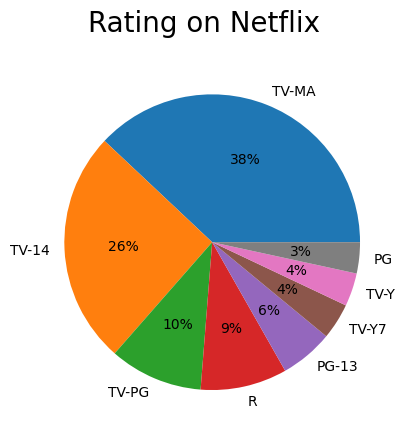

In [ ]:
plt.pie(ratings['count'][:8], labels=ratings['rating'][:8],
autopct='%.0f%%')
plt.suptitle('Rating on Netflix', fontsize=20)

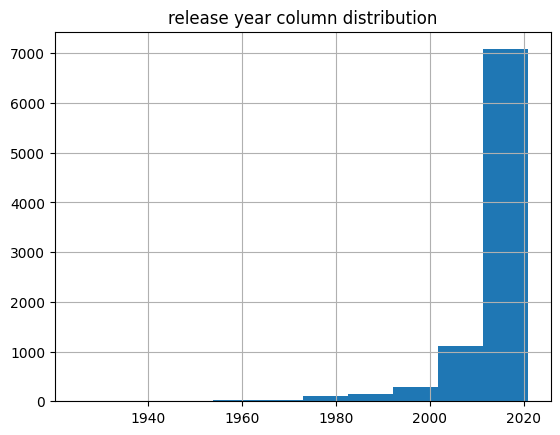

In [26]:
df['release_year'].hist()
plt.title('release year column distribution')
plt.show()

In [27]:
df1 = df[['type', 'release_year']]
df1 = df1.rename(columns = {"release_year":"Release Year", "type": "Type"})
df2 = df1.groupby(['Release Year', 'Type']).size().reset_index(name='Total Count')
print(df2)

     Release Year     Type  Total Count
0            1925  TV Show            1
1            1942    Movie            2
2            1943    Movie            3
3            1944    Movie            3
4            1945    Movie            3
..            ...      ...          ...
114          2019  TV Show          397
115          2020    Movie          517
116          2020  TV Show          436
117          2021    Movie          277
118          2021  TV Show          315

[119 rows x 3 columns]


<ipython-input-28-606e9e98b04d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df2['Release Year'], y=df2['Total Count'],


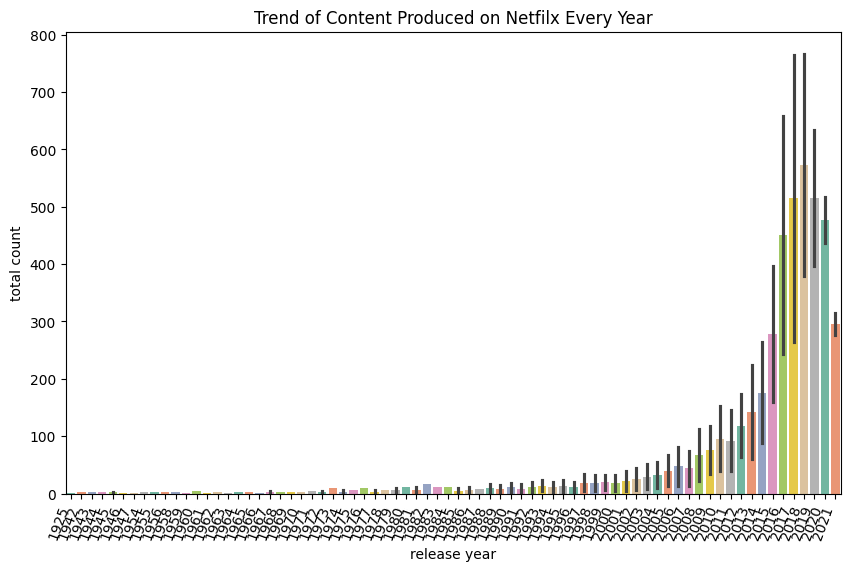

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df2['Release Year'], y=df2['Total Count'],
            palette='Set2')
plt.title('Trend of Content Produced on Netfilx Every Year')
plt.xlabel('release year')
plt.ylabel('total count')
plt.xticks(rotation=70, ha='right')
plt.show()